# Measuring properties of zones

In [1]:
# Necessary imports
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats, gen_zonal_stats
import osmnx as ox
import geopandas as gpd
%matplotlib inline

In [2]:
# Open the mosaic raster file
raster = rasterio.open("Data/Helsinki_DEM_2x2m_Mosaic.tif")

# Retrieve two place names from open street maps (including boundary geometry)
kallio_q = "Kallio, Helsinki, Finland"
pihlajamaki_q = "Pihlajamäki, Malmi, Helsinki, Finland"
kallio = ox.gdf_from_place(kallio_q)
pihlajamaki = ox.gdf_from_place(pihlajamaki_q)
kallio.head()

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,24.961987,60.187507,60.176323,24.933426,"POLYGON ((24.9334263 60.183172, 24.9352256 60....","Kallio, Helsinki, Helsingin seutukunta, Uusima..."


In [3]:
# Reproject region boundaries to the raster CRS
kallio = kallio.to_crs(crs=raster.crs.data)
pihlajamaki = pihlajamaki.to_crs(crs=raster.crs.data)
kallio.head()

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,24.961987,60.187507,60.176323,24.933426,"POLYGON ((385381.666847388 6673604.63300579, 3...","Kallio, Helsinki, Helsingin seutukunta, Uusima..."


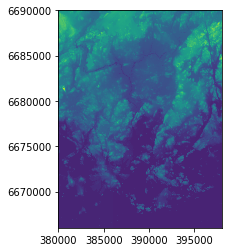

In [4]:
# Plot the raster map and overlay the regions
ax = show((raster, 1))
kallio.plot(ax=ax, facecolor='None', edgecolor='red', linewidth=2)
pihlajamaki.plot(ax=ax, facecolor='None', edgecolor='blue', linewidth=2)

In [5]:
# Which one is higher? Kallio or Pihlajamäki?

# Read the data as a numpy array and get the coordinate transformation matrix
rastArr = raster.read(1)
affine = raster.affine

kStatsDict = zonal_stats(kallio, rastArr, affine=affine, nodata=-999, stats=['min', 'max', 'mean', 'median', 'majority'])
pStatsDict= zonal_stats(pihlajamaki, rastArr, affine=affine, nodata=-999, stats=['min', 'max', 'mean', 'median', 'majority'])


/opt/share/anaconda3_GIS/envs/gis/lib/python3.5/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.array.dtype, float)


In [6]:
for k in kStatsDict[0].keys():
    print(k, ":", kStatsDict[0][k], pStatsDict[0][k])

min : -2.1760001182556152 8.73799991607666
max : 37.388999938964844 46.30400085449219
mean : 12.96425898303966 24.560033970865877
median : 11.75100040435791 24.17300033569336
majority : 0.3490000069141388 10.41100025177002
